## Task: Predict Employee satifaction 
In this activity, I test several models for **predicting numeric outcomes**. Is there a chance of them leaving the organization? 

I will be using an "EmployeeSatisfaction" dataset to predict how satisfied an employee is based on other determinants such as Age, Gender, Education Level, Job Level, etc. The dataset is made up of 12 columns and 625 rows.

In [8]:
#loading the 50_startups datasets as a panda dataframe
import pandas as pd
dataset = pd.read_csv("EmpSatisfaction data_LinReg.csv")
dataset

,Employee ID,Age,Gender,Education Level,HourlyRate,JobLevel,YearsSincePromotion,WeeklyHoursWorked,LastPerformanceRating,YearsAtCompany,YearsCurrentRole,JobSatisfactionRating
0,1,41,0,2,94,2,3,40,3,6,4,9
1,2,49,1,1,61,8,1,47,4,10,7,9
2,3,37,1,2,92,1,0,40,3,0,0,9
3,4,33,0,4,56,1,3,40,3,8,7,6
4,5,27,1,1,140,7,2,40,3,2,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...
620,621,35,0,1,153,1,1,44,3,6,5,7
621,622,36,1,2,56,2,4,40,3,18,14,5
622,623,32,1,4,73,2,0,40,3,5,2,5
623,624,30,1,4,75,6,0,40,3,5,4,6


In [9]:
#take a look a descriptive statistics 
dataset.describe()

,Employee ID,Age,Gender,Education Level,HourlyRate,JobLevel,YearsSincePromotion,WeeklyHoursWorked,LastPerformanceRating,YearsAtCompany,YearsCurrentRole,JobSatisfactionRating
count,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.00000
mean,313.000000,36.900800,0.595200,2.892800,90.150400,3.974400,2.865600,40.934400,3.163200,7.060800,4.267200,6.82400
std,180.566239,9.344189,0.491246,1.036063,41.455836,2.575025,3.306634,7.576988,0.369844,6.446487,3.667769,1.75897
min,1.000000,18.000000,0.000000,1.000000,30.000000,1.000000,0.000000,16.000000,3.000000,0.000000,0.000000,2.00000
25%,157.000000,30.000000,0.000000,2.000000,59.000000,2.000000,0.000000,40.000000,3.000000,3.000000,2.000000,6.00000
50%,313.000000,35.000000,1.000000,3.000000,79.000000,3.000000,1.000000,40.000000,3.000000,5.000000,3.000000,7.00000
75%,469.000000,43.000000,1.000000,4.000000,122.000000,6.000000,4.000000,45.000000,3.000000,9.000000,7.000000,8.00000
max,625.000000,60.000000,1.000000,5.000000,193.000000,10.000000,15.000000,96.000000,4.000000,40.000000,18.000000,10.00000


### Data Visualization
I will use the "seaborn library" to create some visualizations

C:\Users\nicho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

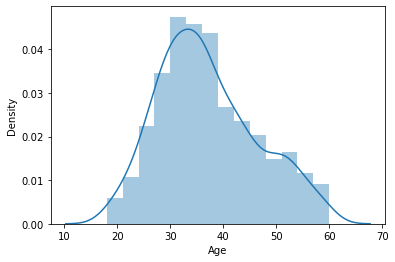

In [10]:
#visually exploring the dataset 
#the next few cells demonstrate several graphs that can be useful to visually explore your data
import seaborn as sb
sb.distplot(dataset['Age']) #histogram for R&D spending

C:\Users\nicho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='WeeklyHoursWorked', ylabel='Density'>

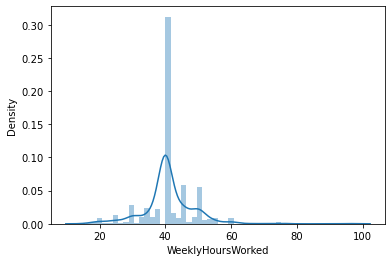

In [11]:
sb.distplot(dataset['WeeklyHoursWorked']) #histogram for Administration spending

<AxesSubplot:xlabel='Gender', ylabel='HourlyRate'>

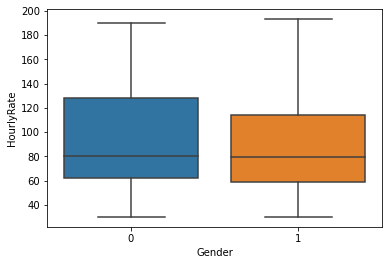

In [12]:
#comparing R&D spending across states using box
sb.boxplot(x="Gender",y="HourlyRate", data=dataset)

<AxesSubplot:xlabel='HourlyRate', ylabel='WeeklyHoursWorked'>

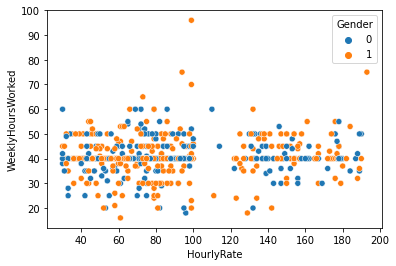

In [13]:
#scatter plot of Profits vs. Marketing Spending, colored by State
sb.scatterplot(x="HourlyRate",y="WeeklyHoursWorked",hue="Gender", data=dataset)


### Preparing data for model training -- Data Wrangging

In [14]:
#defining input and outcome variables
y = dataset[['JobSatisfactionRating']]  #profit

X = dataset.drop(['Employee ID','JobSatisfactionRating'],axis=1) #other variables

In [15]:
#before encoding the State variable
X.head(3)

,Age,Gender,Education Level,HourlyRate,JobLevel,YearsSincePromotion,WeeklyHoursWorked,LastPerformanceRating,YearsAtCompany,YearsCurrentRole
0,41,0,2,94,2,3,40,3,6,4
1,49,1,1,61,8,1,47,4,10,7
2,37,1,2,92,1,0,40,3,0,0


In [16]:
#The state variable is categorical, 
#we use binary encoding to create binary variable for each level of the State variable
pd.get_dummies(X['Education Level']).head(3)

,1,2,3,4,5
0,0,1,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0


In [17]:
#add the binary encoded Education Level variables to our X variable
X=pd.concat([X,pd.get_dummies(X['Education Level'])],axis=1) 
# drop the Education Level column, since we now have the binary encoded vars
X.drop(['Education Level'],axis=1,inplace=True)

In [18]:
#after encoding the State variable
X.drop([5],axis=1,inplace=True)
X.head(3)

,Age,Gender,HourlyRate,JobLevel,YearsSincePromotion,WeeklyHoursWorked,LastPerformanceRating,YearsAtCompany,YearsCurrentRole,1,2,3,4
0,41,0,94,2,3,40,3,6,4,0,1,0,0
1,49,1,61,8,1,47,4,10,7,1,0,0,0
2,37,1,92,1,0,40,3,0,0,0,1,0,0


### Splitting the data into Train and Test sets

Keeping 20% for testing and the rest for training 

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)  #using same random_state value for replicability


In [20]:
# the resulting datasets after splitting
X_train.describe()

,Age,Gender,HourlyRate,JobLevel,YearsSincePromotion,WeeklyHoursWorked,LastPerformanceRating,YearsAtCompany,YearsCurrentRole,1,2,3,4
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,37.234000,0.588000,89.910000,4.014000,2.908000,40.748000,3.158000,7.296000,4.358000,0.126000,0.214000,0.356000,0.272000
std,9.478128,0.492688,41.259114,2.555556,3.367226,7.799369,0.365106,6.653791,3.779206,0.332182,0.410538,0.479295,0.445436
min,18.000000,0.000000,30.000000,1.000000,0.000000,16.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,59.000000,2.000000,0.000000,40.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,1.000000,79.500000,3.000000,1.500000,40.000000,3.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,1.000000,116.000000,6.000000,5.000000,45.000000,3.000000,10.000000,7.000000,0.000000,0.000000,1.000000,1.000000
max,60.000000,1.000000,193.000000,10.000000,15.000000,96.000000,4.000000,40.000000,18.000000,1.000000,1.000000,1.000000,1.000000


### Linear regression model

In [21]:
#### Fitting Multiple Linear Regression to the Training set  ####
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [25]:
# Predicting the Test set results
y_pred_lin = lin_reg.predict(X_test)
y_pred_lin

array([[ 6.10895697],
       [ 6.41793969],
       [ 5.79650923],
       [ 6.73364349],
       [ 6.14027836],
       [ 6.3921542 ],
       [ 7.13770801],
       [ 6.11675925],
       [ 5.46810256],
       [ 7.23897028],
       [ 5.5272481 ],
       [ 8.48259235],
       [ 5.85746168],
       [ 6.20046187],
       [ 5.51438112],
       [ 8.24855483],
       [ 9.25211189],
       [ 6.24958818],
       [ 5.57761472],
       [ 5.87460466],
       [ 5.96699508],
       [ 7.31817026],
       [ 5.13561672],
       [ 5.55632388],
       [ 8.76357942],
       [ 6.68224938],
       [ 6.57843219],
       [ 5.80137483],
       [ 9.68155994],
       [ 8.54152924],
       [ 5.13571462],
       [ 6.65719343],
       [ 7.65415108],
       [ 7.497321  ],
       [ 5.59505109],
       [ 6.46774634],
       [ 9.90883113],
       [ 5.97267396],
       [ 5.12732608],
       [ 7.15530712],
       [ 8.62811622],
       [ 9.00613559],
       [ 6.88671428],
       [ 6.4468567 ],
       [ 6.3058011 ],
       [ 8

### Evaluating the model
importing model evaluation metrics from sklearn 

In [26]:
from sklearn import metrics
import math
# The coefficients
print('Coefficients: \n', lin_reg.coef_)
# The mean squared error
#print("Mean squared error: %.2f" % metrics.mean_squared_error(Y_test, y_pred_lin))
print("Root Mean squared error: %.2f" % math.sqrt(metrics.mean_squared_error(Y_test, y_pred_lin)))
# The mean absolute error
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(Y_test, y_pred_lin))
# R-square: 1 is perfect prediction
#print('R-square: %.2f' % metrics.r2_score(Y_test, y_pred_lin))


Coefficients: 
 [[ 0.00482626  0.11256414  0.02779865  0.12167708 -0.06548434  0.00243174
  -0.24522371 -0.01698523  0.02745693 -0.15480991 -0.11070706 -0.25659579
  -0.32734171]]
Root Mean squared error: 1.13
Mean absolute error: 0.90


### Decision Tree Regression model

In [28]:
#### Fitting Decision Tree Regression to the dataset  ###########
from sklearn.tree import DecisionTreeRegressor
DecTree_reg = DecisionTreeRegressor(random_state = 123)
DecTree_reg.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=123)

### Evaluating the model

In [29]:
# evaluating Decision Tree Regression
y_pred_DT = DecTree_reg.predict(X_test)
# The mean squared error
print("Root Mean squared error: %.2f" % math.sqrt(metrics.mean_squared_error(Y_test, y_pred_DT)))
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(Y_test, y_pred_DT))

Root Mean squared error: 1.65
Mean absolute error: 1.23


## Random Forest Regression

In [34]:
#### Fitting Random Forest Regression to the dataset ##########
from sklearn.ensemble import RandomForestRegressor
RandForest_reg = RandomForestRegressor(n_estimators = 20, min_samples_leaf=5, random_state = 0)
RandForest_reg.fit(X_train, Y_train)

C:\Users\nicho\AppData\Local\Temp/ipykernel_18696/3365393196.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandForest_reg.fit(X_train, Y_train)


RandomForestRegressor(min_samples_leaf=5, n_estimators=20, random_state=0)

In [35]:
#evaluting RandForest_reg
y_pred_RF = RandForest_reg.predict(X_test)
#print("Mean squared error: %.2f" % metrics.mean_squared_error(Y_test, y_pred_RF))
print("Root Mean squared error: %.2f" % math.sqrt(metrics.mean_squared_error(Y_test, y_pred_RF)))
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(Y_test, y_pred_RF))

Root Mean squared error: 1.14
Mean absolute error: 0.91


### Support Vector Regression

In [30]:
#########  Support Vector Regression #########
# Feature Scaling
from sklearn.preprocessing import StandardScaler,minmax_scale
sc_X = StandardScaler() 
sc_y = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
y_train_sc = sc_y.fit_transform(Y_train) #.reshape(-1,1)

In [31]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(X_train_sc, y_train_sc)

C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

### Evaluating the model

In [32]:
# evaluating SVR regresion
y_pred = svr_reg.predict(sc_X.fit_transform(X_test))
y_pred_SVC = sc_y.inverse_transform(y_pred) #inverse applying the scaler

#print("Mean squared error: %.2f" % metrics.mean_squared_error(Y_test, y_pred_SVC))
print("Root Mean squared error: %.2f" % math.sqrt(metrics.mean_squared_error(Y_test, y_pred_SVC)))
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(Y_test, y_pred_SVC))

Root Mean squared error: 1.16
Mean absolute error: 0.92


### Comparing Different models


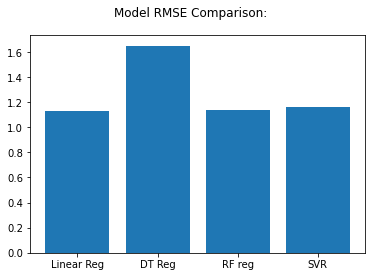

In [36]:
import matplotlib.pyplot as plt
names = ['Linear Reg','DT Reg','RF reg','SVR']
predictions=[y_pred_lin,y_pred_DT,y_pred_RF,y_pred_SVC]
results = []

for y_pred in predictions:
  rmse=round(math.sqrt(metrics.mean_squared_error(Y_test, y_pred)),2)
  #mae=round(metrics.mean_absolute_error(Y_test, y_pred),2)
  results.append(rmse) #change rmse to mae 
  
# create a bar plot to compare values
fig = plt.figure()
fig.suptitle('Model RMSE Comparison: ')
ax = fig.add_subplot(111)
plt.bar(names,results)
plt.show()

In [71]:
results

[1.13, 1.65, 1.14, 1.16]

### Conclusion
Linear Regression is the best model in our case to predict employee satisfaction. This is because we have a low RMSE rate 
which means our model is effectively predicting satifaction rate given the other determinants. 